In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)


In [41]:
df =  pd.read_csv('RechargeCode.csv')
df.head()

,New Date,MONEY
0,1/1/2019,100.0
1,1/1/2019,100.0
2,1/1/2019,50.0
3,1/1/2019,50.0
4,1/1/2019,20.0


In [42]:
df['Time'] = pd.to_datetime(df['New Date'], format='%m/%d/%Y', errors="coerce")
df.head()

,New Date,MONEY,Time
0,1/1/2019,100.0,2019-01-01
1,1/1/2019,100.0,2019-01-01
2,1/1/2019,50.0,2019-01-01
3,1/1/2019,50.0,2019-01-01
4,1/1/2019,20.0,2019-01-01


In [44]:
df.drop('New Date',axis = 1 ,inplace = True)

In [45]:
df.head()

,MONEY,Time
0,100.0,2019-01-01
1,100.0,2019-01-01
2,50.0,2019-01-01
3,50.0,2019-01-01
4,20.0,2019-01-01


In [46]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Month_Name'] = df['Time'].dt.month_name()
df['Week'] = df['Time'].dt.week
df['Day'] = df['Time'].dt.day
df['Week_Day'] = df['Time'].dt.weekday
df['Day_Name'] = df['Time'].dt.day_name()

In [47]:
df

,MONEY,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name
0,100.0,2019-01-01,2019,1,January,1,1,1,Tuesday
1,100.0,2019-01-01,2019,1,January,1,1,1,Tuesday
2,50.0,2019-01-01,2019,1,January,1,1,1,Tuesday
3,50.0,2019-01-01,2019,1,January,1,1,1,Tuesday
4,20.0,2019-01-01,2019,1,January,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...
14833,30.0,2021-02-01,2021,2,February,5,1,0,Monday
14834,60.0,2021-02-01,2021,2,February,5,1,0,Monday
14835,227.0,2021-02-01,2021,2,February,5,1,0,Monday
14836,200.0,2021-02-01,2021,2,February,5,1,0,Monday


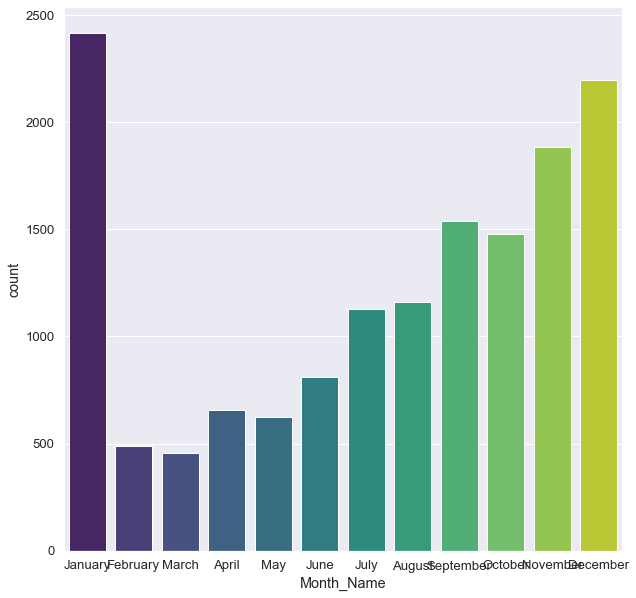

In [48]:
sns.countplot(x='Month_Name', data=df, palette='viridis')

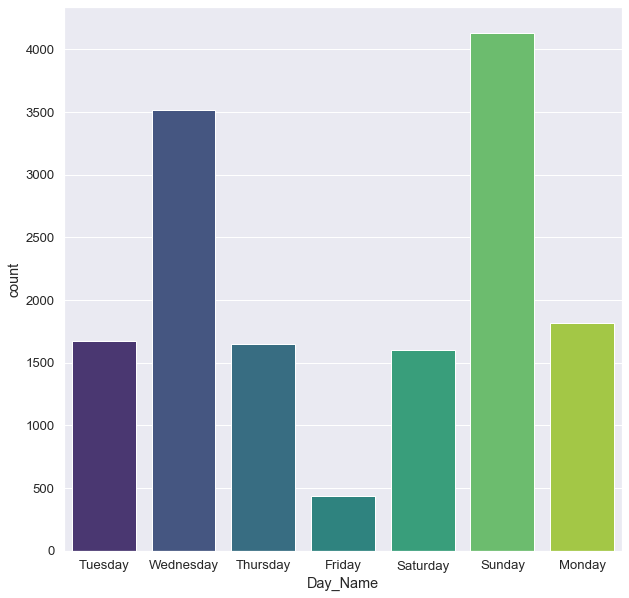

In [49]:
sns.countplot(x='Day_Name', data=df, palette='viridis')

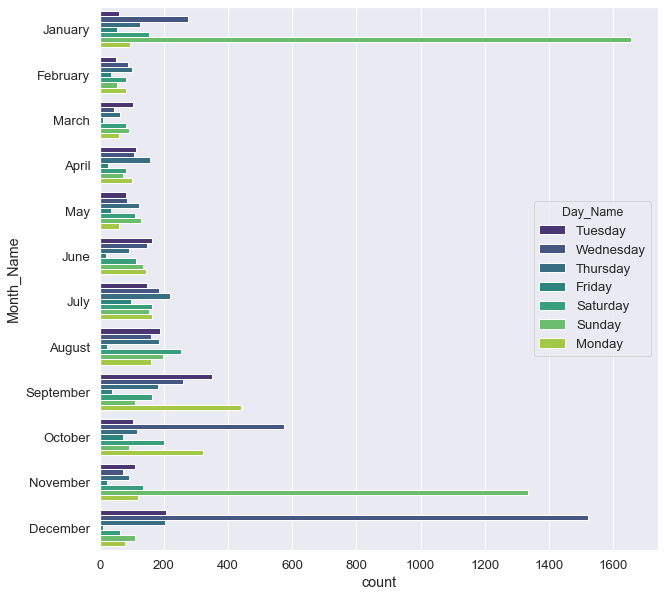

In [50]:
sns.countplot(y='Month_Name', data=df, palette='viridis', hue='Day_Name')

In [51]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)
df.head()

,MONEY,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Season
0,100.0,2019-01-01,2019,1,January,1,1,1,Tuesday,Winter
1,100.0,2019-01-01,2019,1,January,1,1,1,Tuesday,Winter
2,50.0,2019-01-01,2019,1,January,1,1,1,Tuesday,Winter
3,50.0,2019-01-01,2019,1,January,1,1,1,Tuesday,Winter
4,20.0,2019-01-01,2019,1,January,1,1,1,Tuesday,Winter


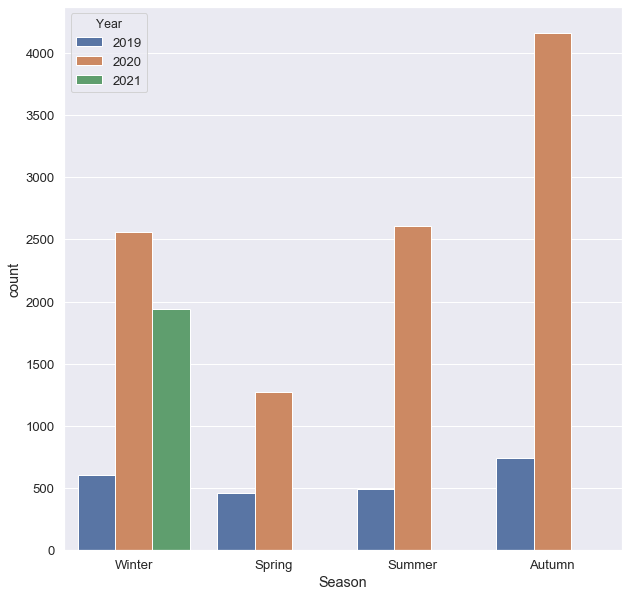

In [53]:
sns.countplot(x='Season', hue='Year', data=df)

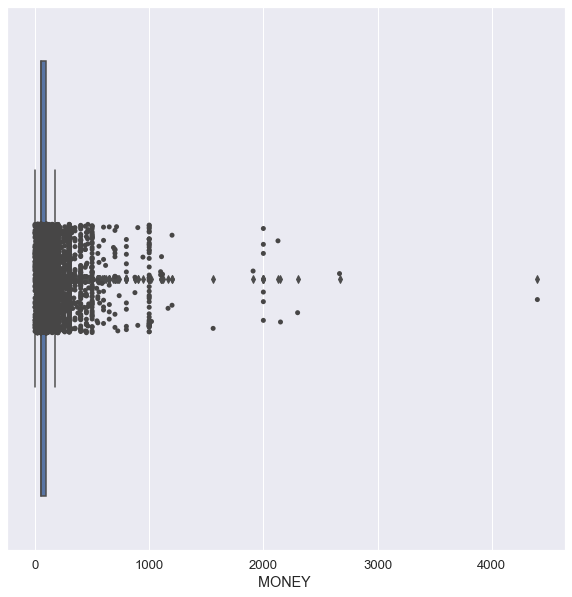

In [100]:
sns.boxplot(x='MONEY ', data=df)
sns.stripplot(x='MONEY ', data=df, color="#474646")

In [101]:
from datasist.structdata import detect_outliers

In [104]:
outliers_indices = detect_outliers(df, 0, ['MONEY '])
len(outliers_indices)

1337

In [63]:
df.groupby('Time' ,as_index = False ).sum()

,Time,MONEY,Year,Month,Week,Day,Week_Day
0,2019-01-01,340.0,12114,6,6,6,6
1,2019-01-02,639.0,14133,7,7,14,14
2,2019-01-03,20.0,2019,1,1,3,3
3,2019-01-04,50.0,2019,1,1,4,4
4,2019-01-05,710.0,10095,5,5,25,25
...,...,...,...,...,...,...,...
654,2021-01-10,206339.0,3152760,1560,1560,15600,9360
655,2021-01-20,19061.0,341549,169,507,3380,338
656,2021-01-27,2520.0,44462,22,88,594,44
657,2021-01-31,2640.0,46483,23,92,713,138


In [71]:
ds = df.groupby('Time' ,as_index = False ).sum()
ds.columns

Index(['Time', 'MONEY ', 'Year', 'Month', 'Week', 'Day', 'Week_Day'], dtype='object')

In [72]:
ds.drop(['Year', 'Month', 'Week', 'Day', 'Week_Day'] , axis =1 ,  inplace = True)

In [73]:
ds.head()

,Time,MONEY
0,2019-01-01,340.0
1,2019-01-02,639.0
2,2019-01-03,20.0
3,2019-01-04,50.0
4,2019-01-05,710.0


In [74]:
ds['Year'] = ds['Time'].dt.year
ds['Month'] = ds['Time'].dt.month
ds['Month_Name'] = ds['Time'].dt.month_name()
ds['Week'] = ds['Time'].dt.week
ds['Day'] = ds['Time'].dt.day
ds['Week_Day'] = ds['Time'].dt.weekday
ds['Day_Name'] = ds['Time'].dt.day_name()

In [75]:
ds

,Time,MONEY,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name
0,2019-01-01,340.0,2019,1,January,1,1,1,Tuesday
1,2019-01-02,639.0,2019,1,January,1,2,2,Wednesday
2,2019-01-03,20.0,2019,1,January,1,3,3,Thursday
3,2019-01-04,50.0,2019,1,January,1,4,4,Friday
4,2019-01-05,710.0,2019,1,January,1,5,5,Saturday
...,...,...,...,...,...,...,...,...,...
654,2021-01-10,206339.0,2021,1,January,1,10,6,Sunday
655,2021-01-20,19061.0,2021,1,January,3,20,2,Wednesday
656,2021-01-27,2520.0,2021,1,January,4,27,2,Wednesday
657,2021-01-31,2640.0,2021,1,January,4,31,6,Sunday


In [83]:
dc = df.groupby('Time' ,as_index = False ).count()
dc


,Time,MONEY,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Season
0,2019-01-01,6,6,6,6,6,6,6,6,6
1,2019-01-02,7,7,7,7,7,7,7,7,7
2,2019-01-03,1,1,1,1,1,1,1,1,1
3,2019-01-04,1,1,1,1,1,1,1,1,1
4,2019-01-05,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...
654,2021-01-10,1560,1560,1560,1560,1560,1560,1560,1560,1560
655,2021-01-20,169,169,169,169,169,169,169,169,169
656,2021-01-27,22,22,22,22,22,22,22,22,22
657,2021-01-31,23,23,23,23,23,23,23,23,23


In [94]:
ds['RechargeCount'] = dc['Month']

In [95]:
ds

,Time,MONEY,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,RechargeCount
0,2019-01-01,340.0,2019,1,January,1,1,1,Tuesday,6
1,2019-01-02,639.0,2019,1,January,1,2,2,Wednesday,7
2,2019-01-03,20.0,2019,1,January,1,3,3,Thursday,1
3,2019-01-04,50.0,2019,1,January,1,4,4,Friday,1
4,2019-01-05,710.0,2019,1,January,1,5,5,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
654,2021-01-10,206339.0,2021,1,January,1,10,6,Sunday,1560
655,2021-01-20,19061.0,2021,1,January,3,20,2,Wednesday,169
656,2021-01-27,2520.0,2021,1,January,4,27,2,Wednesday,22
657,2021-01-31,2640.0,2021,1,January,4,31,6,Sunday,23


In [96]:
ds.describe()

,MONEY,Year,Month,Week,Day,Week_Day,RechargeCount
count,659.000000,659.000000,659.000000,659.00000,659.000000,659.000000,659.000000
mean,1993.289636,2019.522003,6.321700,25.93475,16.084977,2.918058,22.515933
std,10441.114331,0.526546,3.440727,15.05129,8.929753,2.047155,98.217755
min,20.000000,2019.000000,1.000000,1.00000,1.000000,0.000000,1.000000
25%,300.000000,2019.000000,3.000000,13.00000,8.000000,1.000000,5.000000
50%,676.000000,2020.000000,6.000000,26.00000,16.000000,3.000000,9.000000
75%,1531.325000,2020.000000,9.000000,39.00000,24.000000,5.000000,20.000000
max,206339.000000,2021.000000,12.000000,53.00000,31.000000,6.000000,1560.000000


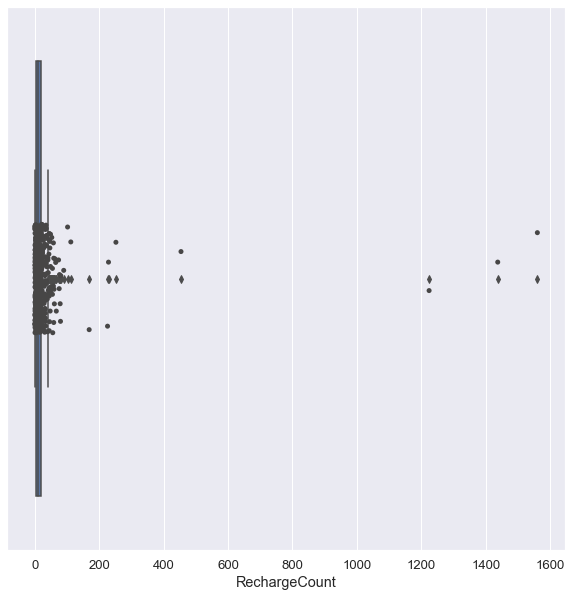

In [97]:
sns.boxplot(x='RechargeCount', data=ds)
sns.stripplot(x='RechargeCount', data=ds, color="#474646")

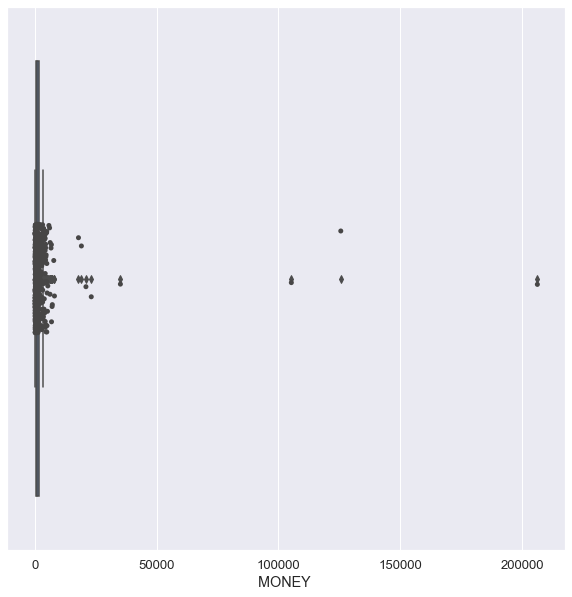

In [98]:
sns.boxplot(x='MONEY ', data=ds)
sns.stripplot(x='MONEY ', data=ds, color="#474646")

In [106]:
outliers_indices = detect_outliers(ds, 0, ['RechargeCount'])
len(outliers_indices)

47

In [107]:
ds.drop(outliers_indices, inplace=True)
ds

,Time,MONEY,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,RechargeCount
0,2019-01-01,340.0,2019,1,January,1,1,1,Tuesday,6
1,2019-01-02,639.0,2019,1,January,1,2,2,Wednesday,7
2,2019-01-03,20.0,2019,1,January,1,3,3,Thursday,1
3,2019-01-04,50.0,2019,1,January,1,4,4,Friday,1
4,2019-01-05,710.0,2019,1,January,1,5,5,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
651,2021-01-04,1710.0,2021,1,January,1,4,0,Monday,22
652,2021-01-06,1275.0,2021,1,January,1,6,2,Wednesday,20
656,2021-01-27,2520.0,2021,1,January,4,27,2,Wednesday,22
657,2021-01-31,2640.0,2021,1,January,4,31,6,Sunday,23


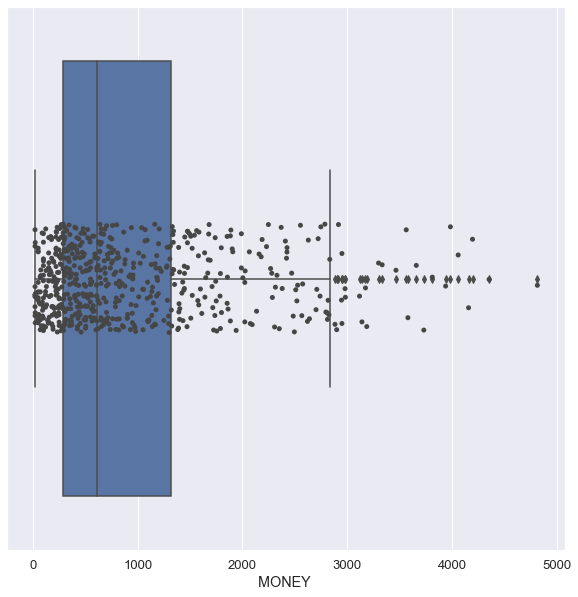

In [108]:
sns.boxplot(x='MONEY ', data=ds)
sns.stripplot(x='MONEY ', data=ds, color="#474646")

In [124]:
outliers_indices = detect_outliers(ds, 0, ['MONEY '])
len(outliers_indices)

21

In [121]:
outliers_indices = detect_outliers(ds, 0, ['MONEY '])
col_mean = ds['MONEY '].mean()
ds['MONEY '].loc[outliers_indices] = col_mean

C:\MyAnaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


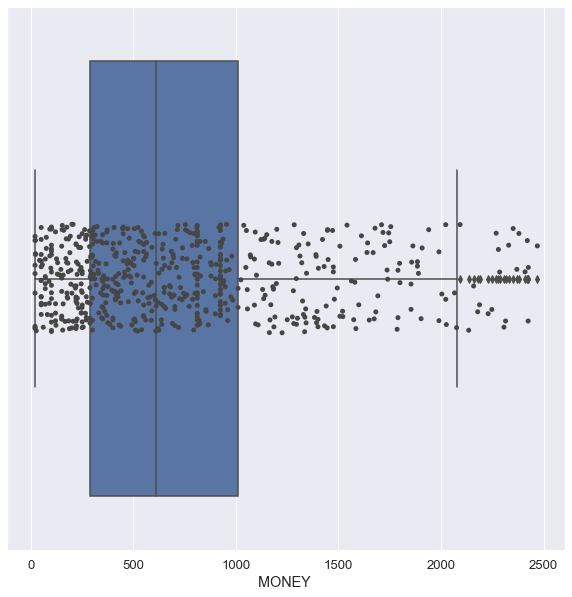

In [122]:
sns.boxplot(x='MONEY ', data=ds)
sns.stripplot(x='MONEY ', data=ds, color="#474646")

In [125]:
ds.columns

Index(['Time', 'MONEY ', 'Year', 'Month', 'Month_Name', 'Week', 'Day',
       'Week_Day', 'Day_Name', 'RechargeCount'],
      dtype='object')

In [126]:
ds


,Time,MONEY,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,RechargeCount
0,2019-01-01,340.00000,2019,1,January,1,1,1,Tuesday,6
1,2019-01-02,639.00000,2019,1,January,1,2,2,Wednesday,7
2,2019-01-03,20.00000,2019,1,January,1,3,3,Thursday,1
3,2019-01-04,50.00000,2019,1,January,1,4,4,Friday,1
4,2019-01-05,710.00000,2019,1,January,1,5,5,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
651,2021-01-04,1710.00000,2021,1,January,1,4,0,Monday,22
652,2021-01-06,1275.00000,2021,1,January,1,6,2,Wednesday,20
656,2021-01-27,811.10988,2021,1,January,4,27,2,Wednesday,22
657,2021-01-31,811.10988,2021,1,January,4,31,6,Sunday,23


In [128]:
ds.drop(['Time', 'Month_Name', 'Day_Name'] , axis = 1 ,inplace = True)

ds

,MONEY,Year,Month,Week,Day,Week_Day,RechargeCount
0,340.00000,2019,1,1,1,1,6
1,639.00000,2019,1,1,2,2,7
2,20.00000,2019,1,1,3,3,1
3,50.00000,2019,1,1,4,4,1
4,710.00000,2019,1,1,5,5,5
...,...,...,...,...,...,...,...
651,1710.00000,2021,1,1,4,0,22
652,1275.00000,2021,1,1,6,2,20
656,811.10988,2021,1,4,27,2,22
657,811.10988,2021,1,4,31,6,23


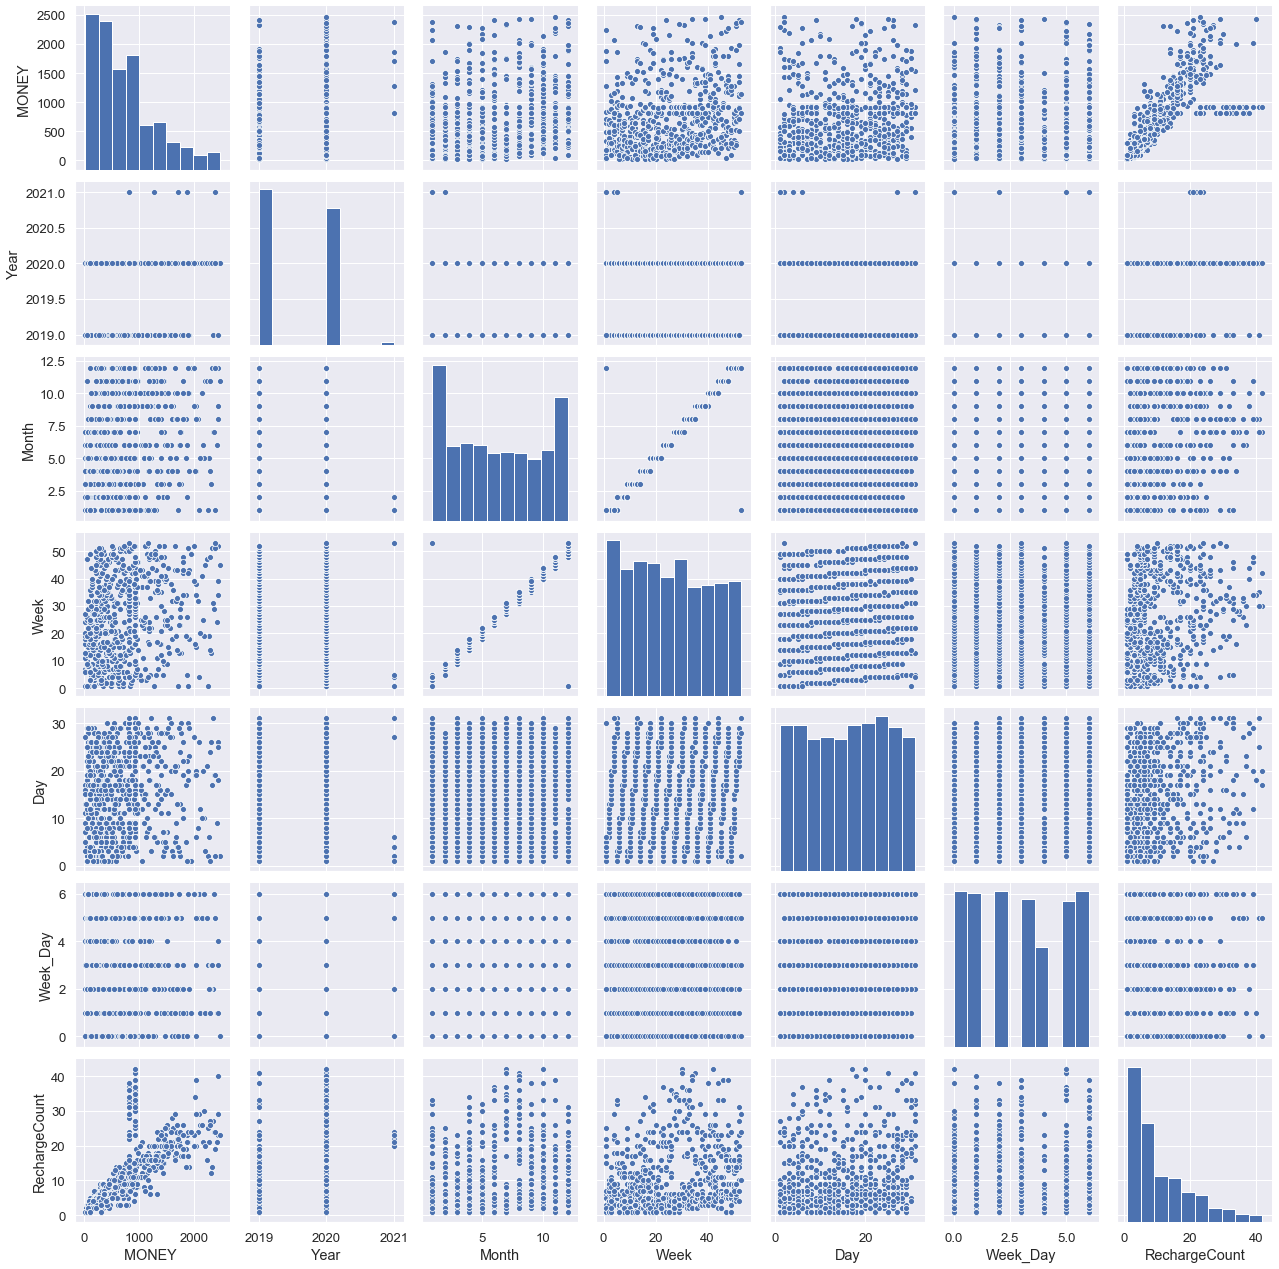

In [129]:
sns.pairplot(ds)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [132]:
x = ds.drop('MONEY ', axis=1)
y = ds['MONEY ']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [134]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [136]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [137]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*10)

Using model: LR
Training Score: 0.5433183827831221
Test Score: 0.6247135819751815
----------
Using model: KNNR
Training Score: 0.7591124642826821
Test Score: 0.6663083343499876
----------
Using model: SVR
Training Score: 0.03450928976379786
Test Score: -0.02526288368808416
----------
Using model: DT
Training Score: 1.0
Test Score: 0.4948123253573389
----------
Using model: RF
Training Score: 0.9532983180926704
Test Score: 0.7676544945223172
----------
Using model: XGBR
Training Score: 0.999655274803692
Test Score: 0.7275509421793678
----------


C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [138]:
model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [139]:
y_pred = model.predict(x_test)
y_pred

array([ 374.0383    ,  565.9121    ,  968.65952318,  337.0411    ,
        568.1966    , 1312.6510988 ,  677.3162    , 1222.54508352,
       1587.38483829, 1313.54579928, 1554.3313592 , 1313.38      ,
       1244.39      , 1579.63252989,  242.6758    , 1655.0291227 ,
        787.6438    , 1508.97106578,  518.0232    ,  428.9618    ,
       1285.1491345 ,  635.4709    ,  541.6188    ,  195.9978    ,
       1198.3910988 ,  769.68      ,  222.0998    ,  730.3442    ,
        810.9483    ,   63.28      ,  473.6672    ,  256.5606    ,
        372.069     ,  591.4732    ,  302.1735    , 1723.1403952 ,
       1224.86925416,  432.9106    ,  951.73280176, 1499.56463762,
        372.5354    ,  736.71      ,  957.2066    ,  522.9416    ,
        480.6372    ,  857.4310988 , 1400.5533952 ,  577.9932    ,
        231.1548    ,  921.46215793, 1685.42264069, 1831.6       ,
       1327.30614953, 1165.5481316 , 1744.79388023,  238.2788    ,
        259.457     , 1044.48269398,  598.2186    , 1600.78088

In [140]:
y_test

249     423.000000
386     500.000000
561     924.088023
71      400.000000
474     510.000000
          ...     
372     350.000000
546     811.109880
633     811.109880
534    2066.000000
274     220.000000
Name: MONEY , Length: 123, dtype: float64

In [141]:
x.columns

Index(['Year', 'Month', 'Week', 'Day', 'Week_Day', 'RechargeCount'], dtype='object')

In [160]:
custom_data = np.array([2022, 3, 4, 25, 3, 25])

In [161]:
custom_data = scaler.transform([custom_data])

In [162]:
prediction = model.predict(custom_data)
prediction

array([1169.37947867])

In [145]:
import joblib

In [146]:
joblib.dump(model, 'model.h5')

['model.h5']

In [147]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']